# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [7]:
medical.shape

(1338, 8)

In [8]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

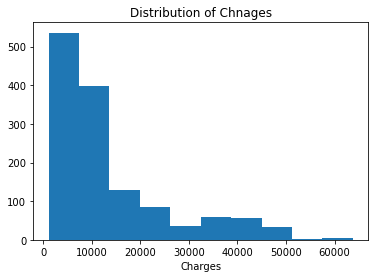

In [9]:
_ = plt.hist(medical['charges'])
_ = plt.xlabel('Charges')
#_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Chnages')
plt.show()

In [10]:
n = len(medical['charges'])
print(n)

1338


In [11]:
mean = np.mean(medical['charges'])
print(mean)

13270.422265141257


In [12]:
# Since this is random sampling data of count 1338 of one of the hospital, we calculate sample deviation denoted by s
# The standard deviation for a sample is similar to the standard deviation for a population except that we divide by n−1 
# instead of n and it is denoted s
s = np.std(medical['charges'], ddof=1)
print(s)

12110.011236693994


__A:__ As observed above, standard deviation is very high and distribution is not normal, it is right skewed
The larger the standard deviation, the more scattered the data are. On the contrary, the smaller the standard deviation, the more the data are centred around the mean.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The sample size is 1338. considering this data as representation of actual data population, we can resample it several times and apply t-test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ one sided

In [13]:
m = mean
s = s
dof = n-1 
confidence = 0.95

#We now need the value of t. The function that calculates the inverse cumulative distribution is ppf. We need to apply the absolute value because the cumulative distribution works with the left tail, so the result would be negative.
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
print('Critical Value :', t_crit)
#Now, we can apply the original formula to calculate the 95% confidence interval
(m-s*t_crit/np.sqrt(n), m+s*t_crit/np.sqrt(n)) 

Critical Value : 1.961739888600845


(12620.954034192644, 13919.890496089869)

__:__ administrator does not need to be concerned as the confidence interval for the mean is 12620.954034192644,13919.890496089869

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
Null hypothesis : There is no difference in the charges for Patients with insurance and those without. (μA = μB)

Alternate Hypothesis : These is difference in charges for Patients with insurance and those without. (μA != μB)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

783 555


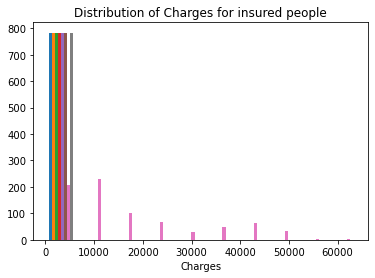

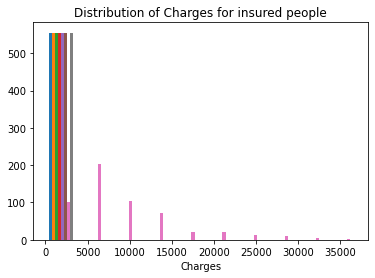

In [38]:
insured_grp = medical.loc[medical['insuranceclaim'] == 1]
insured_grp_n = len(insured_grp)
noninsured_grp = medical.loc[medical['insuranceclaim'] == 0]
noninsured_grp_n = len(noninsured_grp)
print(insured_grp_n, noninsured_grp_n)

_ = plt.hist(insured_grp)
_ = plt.xlabel('Charges')
#_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Charges for insured people')
plt.show()

_ = plt.hist(noninsured_grp)
_ = plt.xlabel('Charges')
#_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Charges for insured people')
plt.show()

In [39]:
# calculating mean
insured_grp_mean = np.mean(insured_grp['charges'])
noninsured_grp_mean = np.mean(noninsured_grp['charges'])
print(insured_grp_mean, noninsured_grp_mean)
# calculating std
insured_grp_s = np.std(insured_grp['charges'])
noninsured_grp_s = np.std(noninsured_grp['charges'])
print(insured_grp_s, noninsured_grp_s)

# calculating variance
insured_grp_var = np.var(insured_grp['charges'])
noninsured_grp_var = np.var(noninsured_grp['charges'])
print(insured_grp_var, noninsured_grp_var)

16423.928276537663 8821.421892306294
14036.956250260411 6440.699841605233
197036140.77172482 41482614.44965368


In [40]:
# formula found on https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/two-sample-t-test.html
print(insured_grp_n)

#We start by calculating our test statistic. This calculation begins with finding the difference between the two averages:
#This difference in our samples estimates the difference between the population means for the two groups.
mean_diff = insured_grp_mean - noninsured_grp_mean

# Next, we calculate the pooled standard deviation. This builds a combined estimate of the overall standard deviation. 
#The estimate adjusts for different group sizes. First, we calculate the pooled variance:

vp = ( ((insured_grp_n - 1) * (insured_grp_s**2)) + ((noninsured_grp_n - 1) * (noninsured_grp_s**2))) / (insured_grp_n + noninsured_grp_n - 2)
print(vp)
#vp1 = ( ((782) * (197036140.77172482)) + ((554) * (41482614.44965367))  ) / (783 + 555 - 2)
#print(vp1)
#Next, we take the square root of the pooled variance to get the pooled standard deviation. This is:
sp = np.sqrt(vp)

print('The square root of the pooled variance to get the pooled standard deviation : ', sp)

783
132532657.551345
The square root of the pooled variance to get the pooled standard deviation :  11512.282899205744


In [49]:
deno = (sp*np.sqrt((1/insured_grp_n) + (1/noninsured_grp_n)) )
#print(mean_diff / deno)

#We now have all the pieces for our test statistic. We have the difference of the averages, 
#the pooled standard deviation and the sample sizes.  We calculate our test statistic as follows:
#t = differnece of group averages/standard error of difference
t = mean_diff/(sp*(np.sqrt(  (1/insured_grp_n) + (1/noninsured_grp_n) )))
print('test statistic value is : ', t)

#calculate critical value 
#We find the theoretical value from the t-distribution based on our null hypothesis which states that the means for 2 groups are equal. 
#To find this value, we need the significance level (α = 0.05) and the degrees of freedom. The degrees of freedom (df) are based on the sample sizes of the two groups.
df = (insured_grp_n + noninsured_grp_n) - 2

#The t value with α = 0.05 and 1336 degrees of freedom is 1.980.
print('The critical value at α = 0.05 and 1336 degrees of freedom is 1.980')



test statistic value is :  11.901306943555385
The critical value at α = 0.05 and 1336 degrees of freedom is 1.980


In [52]:
#A p value is used in hypothesis testing to help you support or reject the null hypothesis. 
#The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the 
#evidence that you should reject the null hypothesis.
print('Decision Rule : if t value is less than or greater than critical value , then we reject the Null hypothsis')
print('We compare the t value of our statistic (11.90130) to the critical value (1.980). ')
print('Since 11.90130 > 1.646 we reject the null hypothesis. i.e Null hypothesis : There is no difference in the charges for Patients with insurance and those without..')   


Decision Rule : if t value is less than or greater than critical value , then we reject the Null hypothsis
We compare the t value of our statistic (11.90130) to the critical value (1.980). 
Since 11.90130 > 1.646 we reject the null hypothesis. i.e Null hypothesis : There is no difference in the charges for Patients with insurance and those without..


In [43]:
stats.ttest_ind(insured_grp['charges'], noninsured_grp['charges'], axis=0, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

In [44]:
# formula found on https://www.statisticshowto.com/probability-and-statistics/t-distribution/independent-samples-t-test/

n1 = len(insured_grp)
n2 = len(noninsured_grp)
print(n1,n2)

#Step 1: Sum the two groups:
sum1 = np.sum(insured_grp['charges'])
sum2 = np.sum(noninsured_grp['charges'])
print(sum1,sum2)

#Step 2: Square the sums from Step 1:
sum1_sq = sum1**2
sum2_sq = sum2**2
print(sum1_sq, sum2_sq)

#Step 3: Calculate the means for the two groups:
mean1 = np.mean(insured_grp['charges'])
mean2 = np.mean(noninsured_grp['charges'])
print(mean1, mean2)

#Step 4: Square the individual scores and then add them up:
ind_sq_sum1 = sum(i*i for i in insured_grp['charges'])
ind_sq_sum2 = sum(i*i for i in noninsured_grp['charges'])
print(ind_sq_sum1, ind_sq_sum2)

#Step 5: Insert your numbers into the following formula and solve:
#(ΣA)2: Sum of data set A, squared (Step 2).
#(ΣB)2: Sum of data set B, squared (Step 2).
#μA: Mean of data set A (Step 3)
#μB: Mean of data set B (Step 3)
#ΣA2: Sum of the squares of data set A (Step 4)
#ΣB2: Sum of the squares of data set B (Step 4)
#nA: Number of items in data set A
#nB: Number of items in data set B

deno1  = ((ind_sq_sum1 - (sum1_sq/n1) ) + (ind_sq_sum1 - (sum2_sq/n2))) / (n1+n2-2)
deno2 = (1/n1) + (1/n2)
deno = np.sqrt(deno1 * deno2)
t = (mean1 - mean2)/ deno

print('t value',t)

#Step 6: Find the Degrees of freedom (nA-1 + nB-1) = 18
df = (n1-1) + (n2-1)
#print(df)

#Step 7: Look up your degrees of freedom (Step 6) in the t-table. If you don’t know what your alpha level is, use 5% (0.05).
print('1336 degrees of freedom at an alpha level of 0.05  = 1.646.')

#Step 8: Compare your calculated value (Step 5) to your table value (Step 7). 
print('Since 1.646 < 7.25422 we reject the null hypothesis.')


783 555
12859935.840529 4895889.15023
165377949822522.3 23969730571339.83
16423.928276537663 8821.421892306294
365489962109.9852 66211554751.701706
t value 7.25422761706986
1336 degrees of freedom at an alpha level of 0.05  = 1.646.
Since 1.646 < 7.25422 we reject the null hypothesis.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test